# Recognizing all digits in MNIST dataset
Completely using fast.ai/pytorch libraries and python classes.

In [1]:
from fastai.vision.all import *

/home/gg/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Preparing dataset

In [5]:
#dir()

In [2]:
full_dataset_dir = untar_data(URLs.MNIST)

In [3]:
image_size=28*28 # np.prod(array(Image.open(Path.ls(full_dataset_dir/'training/3/')[0])).shape)

In [4]:
numbers= range(0,10)

In [5]:
def load_mnist(top_dir='testing'):
    full_dataset=[]
    labels=[]
    for number in numbers:
        path = Path.ls(full_dataset_dir/'{}/{}/'.format(top_dir,number))
        im_tensor = [ tensor(Image.open(p)) for p in path ]
        for i in range(0,len(im_tensor)): # otherwise it would simply be a list of lists
            full_dataset.append(im_tensor[i])
            labels.append(number)
    x_stack = (torch.stack(full_dataset).long()/255).view(-1,image_size)
    y_stack = tensor(labels).long() #.unsqueeze(1) # pytorch needs it in 1D tensor. dont transpose
    del full_dataset,labels
    return x_stack, y_stack    

In [6]:
train_x_stack,train_y_stack= load_mnist('training')
test_x_stack,test_y_stack= load_mnist('testing')

In [7]:
train_x_stack.shape, train_y_stack.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [8]:
test_x_stack.shape, test_y_stack.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [9]:
def make_dls(train_x_stack,train_y_stack,test_x_stack,test_y_stack,bs=256):
    train_dset = list(zip(train_x_stack,train_y_stack))
    test_dset = list(zip(test_x_stack,test_y_stack))
    dl = DataLoader(train_dset,batch_size=bs) # train in batches for each epoch
    test_dl = DataLoader(test_dset,batch_size=bs) # train in batches for each epoch
    dls = DataLoaders(dl,test_dl)
    return dls,train_dset,test_dset

# Define model and loss

In [10]:
simple_net = nn.Sequential(
                nn.Linear(image_size,100),
                nn.ReLU(),
                nn.Linear(100,30),
                nn.ReLU(),
                nn.Linear(30,len(numbers))) # since we have 10 categories as output

In [11]:
loss = nn.CrossEntropyLoss() # loss for multicategories

Can make different combinations and layers. Just make sure the next layer has correct number of activations.

# Training bit using `dls`

In [12]:
bs=256

In [13]:
dls,train_dset,test_dset = make_dls(train_x_stack,train_y_stack,test_x_stack,test_y_stack,bs)

In [14]:
learn = Learner(dls, model=simple_net, lr = 0.00001, loss_func = loss, metrics= accuracy)

In [15]:
learn.fit(200)

epoch,train_loss,valid_loss,accuracy,time
0,2.277319,2.303139,0.086300,00:01
1,2.270117,2.295331,0.113300,00:01
2,2.263340,2.286631,0.185700,00:01
3,2.255983,2.276299,0.258000,00:01
4,2.247682,2.264231,0.291600,00:01
5,2.237839,2.250594,0.322500,00:04
6,2.226509,2.236134,0.373400,00:01
7,2.214303,2.221126,0.431700,00:01
8,2.201429,2.205523,0.470300,00:02
9,2.187942,2.189246,0.500600,00:01


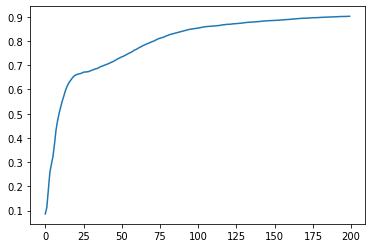

In [16]:
plt.plot(L(learn.recorder.values).itemgot(2))